In [13]:
import future, sys, os, datetime, argparse
# print(os.path.dirname(sys.executable))
import torch
import numpy as np
import matplotlib
from tqdm import tqdm
# from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
matplotlib.rcParams["figure.figsize"] = [20, 10]

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [14]:
import future, sys, os, datetime
# print(os.path.dirname(sys.executable))
import torch
import numpy as np
import matplotlib
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

matplotlib.rcParams["figure.figsize"] = [20, 20]

import torch
from torch.nn import Sequential, Linear, BatchNorm1d
from torch.nn import Tanh
from torch.optim import Adam, RMSprop, SGD
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torch.utils.tensorboard import SummaryWriter

Tensor = torch.Tensor
FloatTensor = torch.FloatTensor
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

torch.set_printoptions(precision=4, sci_mode=False)
np.set_printoptions(precision=4, suppress=True)

sys.path.append(os.path.abspath('../../..')) # .experiments -> MD -> DiffEqNets ->PhD

# import DiffEqNets
# from DiffEqNets.MolecularDynamics.src.MD_Utils import str2bool, matplotlibfigure_to_tensor, clean_hparam_directory
# from DiffEqNets.DiffEqNets_DataUtils import TimeSeries_DataSet
# from DiffEqNets.MolecularDynamics.src.MD_DataUtils import TimeSeries_DataSet

# from DiffEqNets.MolecularDynamics.src.MD_Models import MD_ODENet, MD_HamiltonianNet, MD_ODE2Net, MD_UniversalDiffEq, MD_LSTM, MD_RNN
# from DiffEqNets.MolecularDynamics.src.MD_Hyperparameters import HParams
# from DiffEqNets.MolecularDynamics.src.MD_Train import train
from DiffEqNets.MolecularDynamics.src.MD_DataUtils import load_data, load_and_process_QuantumMachine_data

from importlib import reload
# reload(DiffEqNets.MolecularDynamics.src.MD_DataUtils)
# reload(DiffEqNets.MolecularDynamics.src.MD_DataUtils.load_data)


In [15]:
class Hparams:
#     train_data = 'H2O/HigherEnergy/H2O_HigherEnergy1.npz'
    train_data = 'ethanol_dft.npz'
    subsampling = 1
    val_split = 0.8
    num_samples = 1
hparams = Hparams()
# hparams.train_data='H2O/HigherEnergy/H2O_HigherEnergy1.npz'
#

In [16]:
train_data, val_data, y_mu, y_std, dy_mu, dy_std = load_data(hparams, normalize=True, plot=False, analyze=False)
train_data = np.asfortranarray(train_data.numpy())

In [17]:
train_data.shape
val_data.shape

(1, 444072, 54)

torch.Size([1, 111019, 54])

/Users/ludwigwinkler/anaconda3/envs/phd38/lib/python3.8/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/Users/ludwigwinkler/anaconda3/envs/phd38/lib/python3.8/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


(444072,)

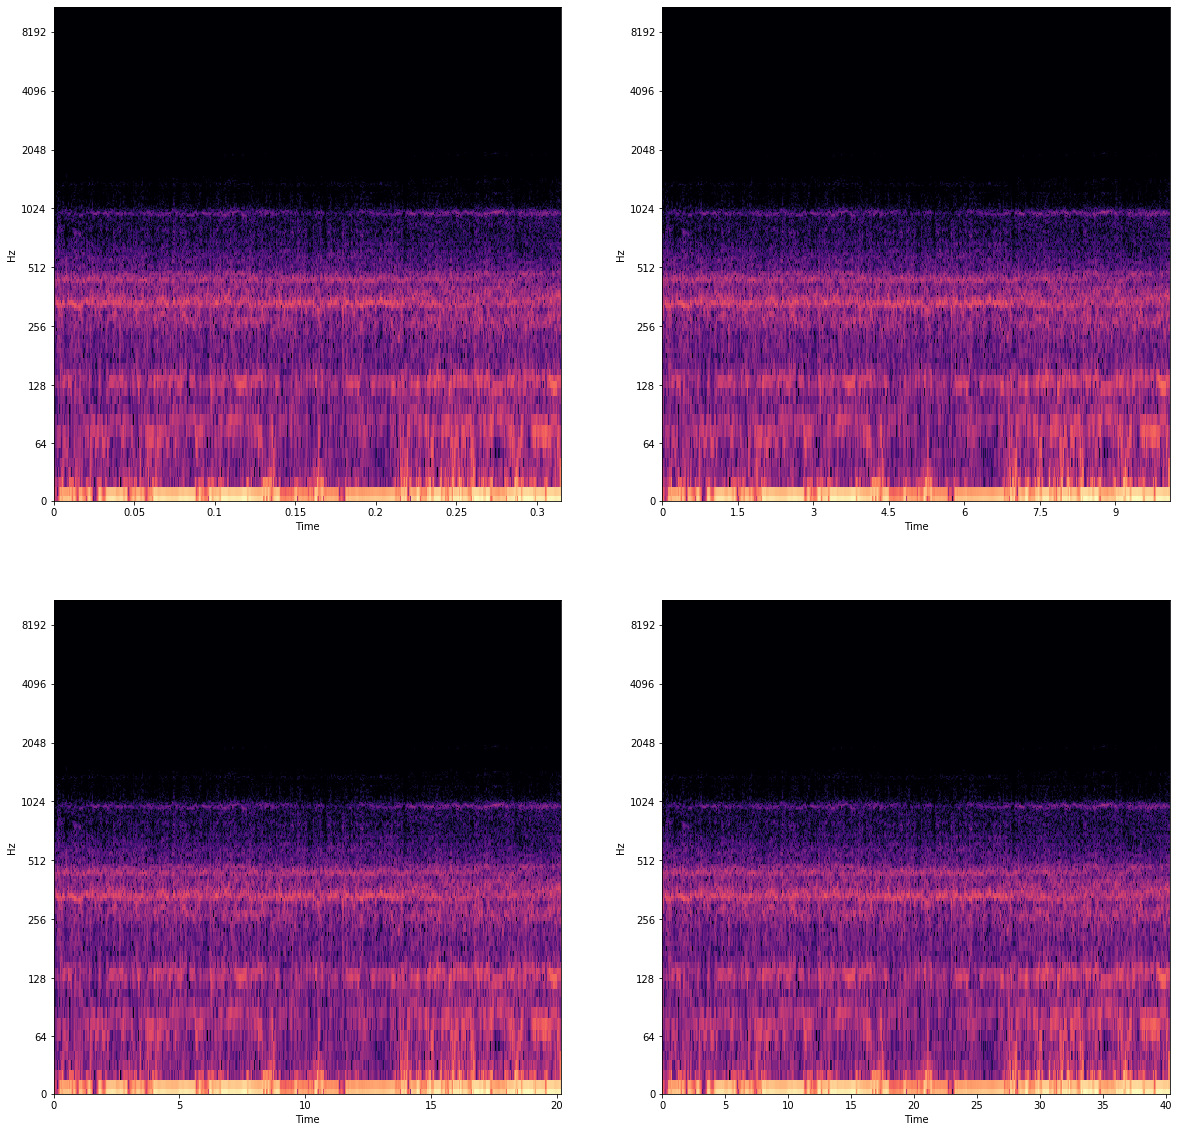

In [22]:
import librosa
from librosa.core import stft
from librosa.display import specshow
data = train_data[0,:,0]
data.shape

fig, axs = plt.subplots(2,2)
axs = axs.flatten()

D_left = np.abs(stft(y=train_data[0,:,0]))
librosa.display.specshow(librosa.amplitude_to_db(D_left, ref=np.max), hop_length=8, y_axis='log', x_axis='time', ax=axs[0])
librosa.display.specshow(librosa.amplitude_to_db(D_left, ref=np.max), hop_length=256, y_axis='log', x_axis='time', ax=axs[1])
librosa.display.specshow(librosa.amplitude_to_db(D_left, ref=np.max), hop_length=512, y_axis='log', x_axis='time', ax=axs[2])
librosa.display.specshow(librosa.amplitude_to_db(D_left, ref=np.max), hop_length=1024, y_axis='log', x_axis='time', ax=axs[3])

In [18]:
matplotlib.rcParams["figure.figsize"] = [20, 10]

In [36]:
data          = load_and_process_QuantumMachine_data(plot=False, analyze=False, normalize=False, string=hparams.train_data)

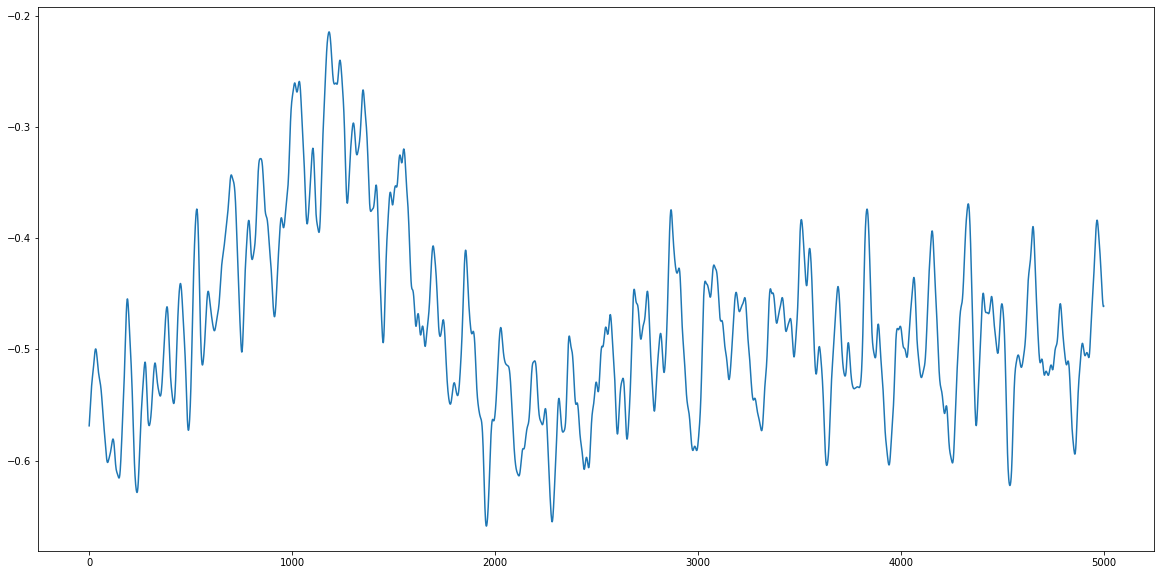

In [51]:
plt.plot(data[0,:5000,1]);

In [47]:
data.shape

torch.Size([1, 555091, 54])

In [48]:
from scipy.signal import butter, lfilter, freqs

In [49]:
order = 20
cutoff = 500
fs = 10**15
nyq = 0.5*fs
normalcutoff = cutoff/nyq
b, a = butter(20, normalcutoff, btype='low', analog=True)
lowpass_data = lfilter(b, a, data[:,:,0].squeeze().T).squeeze()
lowpass_data.shape

(555091,)

ValueError: x and y can be no greater than 2-D, but have shapes (1,) and torch.Size([1, 555091, 54])

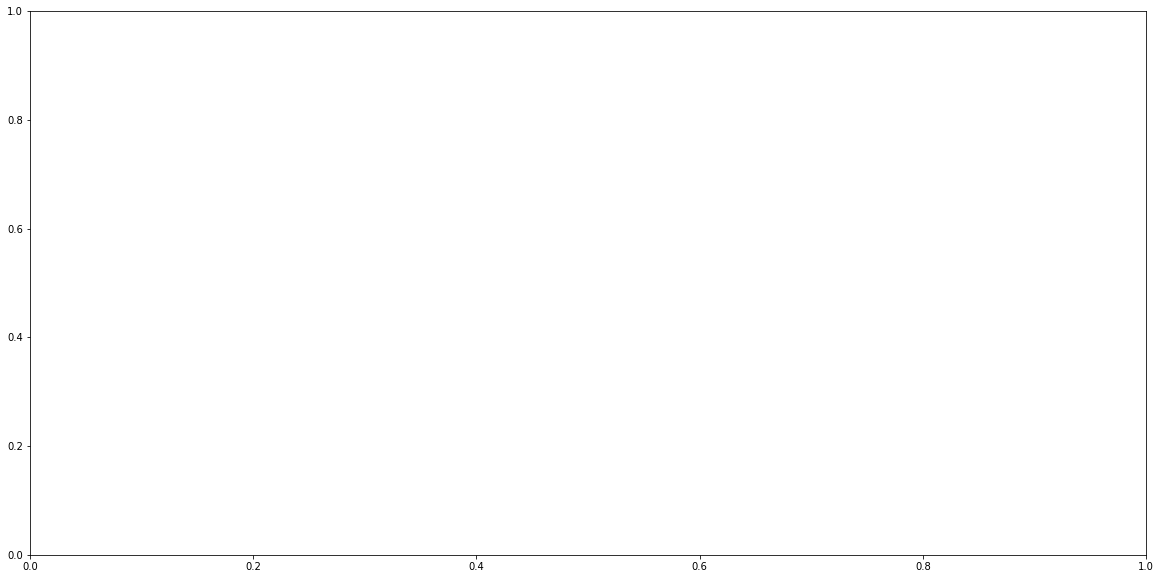

In [50]:
plt.plot(data[:1000]);

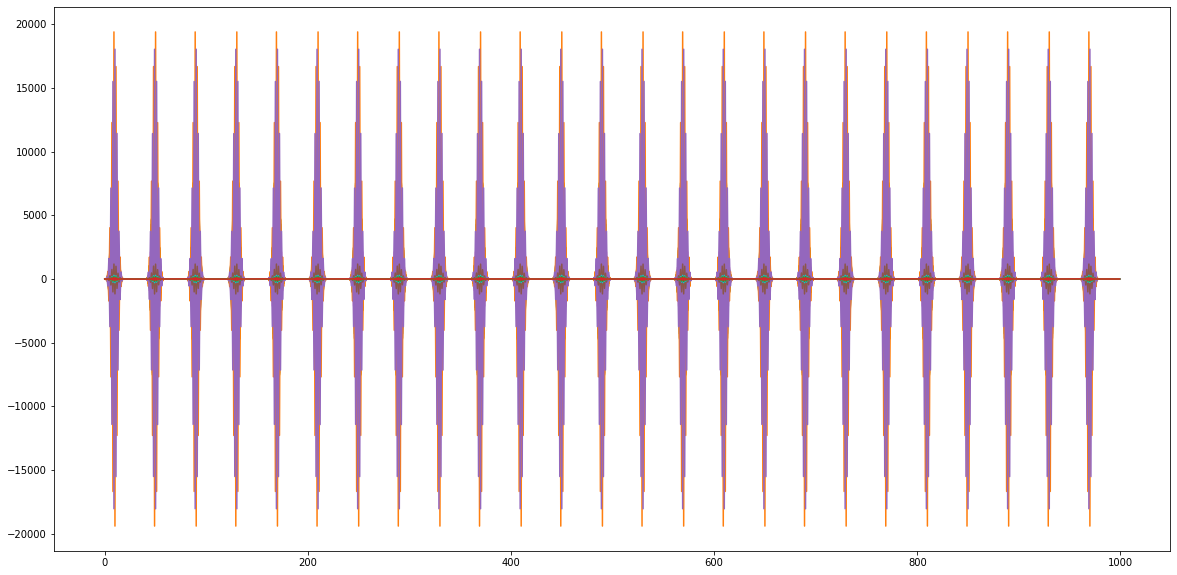

In [34]:
plt.plot(lowpass_data[0,:1000,:]);